In [2]:
import random 
random.seed(212)
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

We keep the Fips number as int to use it as an county ID in the model. Plus transform the date into the week/year for the same reason

In [3]:
df_data = pd.read_csv('data_raw.csv')
df_data['date'] = pd.to_datetime(df_data['date'])
df_data['Week'] = df_data['date'].dt.isocalendar().week
df_data['Year'] = df_data['date'].dt.isocalendar().year
df_data.head()

/var/folders/6f/66wfylh56w70xn5j4ssvqd1c0000gn/T/ipykernel_34270/2330511039.py:1: DtypeWarning: Columns (36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df_data = pd.read_csv('data_raw.csv')


,FIPS,County,State,None,D0,D1,D2,D3,D4,date,date_fips,score,WS10M_MIN,QV2M,T2M_RANGE,WS10M,T2M,WS50M_MIN,T2M_MAX,WS50M,TS,WS50M_RANGE,WS50M_MAX,WS10M_MAX,WS10M_RANGE,PS,T2MDEW,T2M_MIN,T2MWET,PRECTOTCORR,Sort [1],County [2],County Seat(s) [3],Population(2010),Land Areakm²,Land Areami²,Water Areakm²,Water Areami²,Total Areakm²,Total Areami²,Latitude,Longitude,Week,Year
0,1001,Autauga County,AL,100.0,0.0,0.0,0.0,0.0,0.0,2023-02-28,2023-02-281001,0.0,1.52,10.86,-263.62,2.26,20.04,2.34,25.06,4.36,19.29,3.80,6.13,3.11,1.59,100.06,15.14,15.53,17.58,0.24,1,Autauga,Prattville,54571,1539.582,594.436,25.776,9.952,1565.358,604.388,32.536382,-86.64449,9,2023
1,1001,Autauga County,AL,100.0,0.0,0.0,0.0,0.0,0.0,2023-02-21,2023-02-211001,0.0,2.08,13.24,-264.40,3.22,20.37,4.54,25.44,6.16,20.31,2.98,7.52,4.25,2.17,100.08,18.33,16.69,19.35,1.91,1,Autauga,Prattville,54571,1539.582,594.436,25.776,9.952,1565.358,604.388,32.536382,-86.64449,8,2023
2,1001,Autauga County,AL,100.0,0.0,0.0,0.0,0.0,0.0,2023-02-14,2023-02-141001,0.0,1.45,7.63,-258.16,3.01,12.54,2.60,19.96,5.66,12.46,5.07,7.67,4.70,3.24,100.46,9.51,4.97,11.02,0.21,1,Autauga,Prattville,54571,1539.582,594.436,25.776,9.952,1565.358,604.388,32.536382,-86.64449,7,2023
3,1001,Autauga County,AL,100.0,0.0,0.0,0.0,0.0,0.0,2023-02-07,2023-02-071001,0.0,1.44,8.30,-258.89,1.94,12.75,2.36,20.21,4.12,12.80,3.84,6.20,2.27,0.84,101.23,10.80,5.95,11.77,0.44,1,Autauga,Prattville,54571,1539.582,594.436,25.776,9.952,1565.358,604.388,32.536382,-86.64449,6,2023
4,1001,Autauga County,AL,100.0,0.0,0.0,0.0,0.0,0.0,2023-01-31,2023-01-311001,0.0,1.30,9.77,-263.98,1.94,14.72,1.99,19.48,3.60,14.70,3.18,5.18,3.10,1.80,100.96,13.60,10.31,14.16,2.40,1,Autauga,Prattville,54571,1539.582,594.436,25.776,9.952,1565.358,604.388,32.536382,-86.64449,5,2023


Keep columns for the model

In [4]:
df_data.columns

Index(['FIPS', 'County', 'State', 'None', 'D0', 'D1', 'D2', 'D3', 'D4', 'date',
       'date_fips', 'score', 'WS10M_MIN', 'QV2M', 'T2M_RANGE', 'WS10M', 'T2M',
       'WS50M_MIN', 'T2M_MAX', 'WS50M', 'TS', 'WS50M_RANGE', 'WS50M_MAX',
       'WS10M_MAX', 'WS10M_RANGE', 'PS', 'T2MDEW', 'T2M_MIN', 'T2MWET',
       'PRECTOTCORR', 'Sort [1]', 'County [2]', 'County Seat(s) [3]',
       'Population(2010)', 'Land Areakm²', 'Land Areami²', 'Water Areakm²',
       'Water Areami²', 'Total Areakm²', 'Total Areami²', 'Latitude',
       'Longitude', 'Week', 'Year'],
      dtype='object')

In [5]:
df = df_data.drop(columns=['County', 'State', 'None', 'D0', 'D1', 'D2', 'D3', 'D4', 'date',
       'date_fips', 'Sort [1]', 'County [2]', 'County Seat(s) [3]',
       'Population(2010)', 'Land Areakm²', 'Land Areami²', 'Water Areakm²',
       'Water Areami²', 'Total Areakm²', 'Total Areami²'])
df.head()

,FIPS,score,WS10M_MIN,QV2M,T2M_RANGE,WS10M,T2M,WS50M_MIN,T2M_MAX,WS50M,TS,WS50M_RANGE,WS50M_MAX,WS10M_MAX,WS10M_RANGE,PS,T2MDEW,T2M_MIN,T2MWET,PRECTOTCORR,Latitude,Longitude,Week,Year
0,1001,0.0,1.52,10.86,-263.62,2.26,20.04,2.34,25.06,4.36,19.29,3.80,6.13,3.11,1.59,100.06,15.14,15.53,17.58,0.24,32.536382,-86.64449,9,2023
1,1001,0.0,2.08,13.24,-264.40,3.22,20.37,4.54,25.44,6.16,20.31,2.98,7.52,4.25,2.17,100.08,18.33,16.69,19.35,1.91,32.536382,-86.64449,8,2023
2,1001,0.0,1.45,7.63,-258.16,3.01,12.54,2.60,19.96,5.66,12.46,5.07,7.67,4.70,3.24,100.46,9.51,4.97,11.02,0.21,32.536382,-86.64449,7,2023
3,1001,0.0,1.44,8.30,-258.89,1.94,12.75,2.36,20.21,4.12,12.80,3.84,6.20,2.27,0.84,101.23,10.80,5.95,11.77,0.44,32.536382,-86.64449,6,2023
4,1001,0.0,1.30,9.77,-263.98,1.94,14.72,1.99,19.48,3.60,14.70,3.18,5.18,3.10,1.80,100.96,13.60,10.31,14.16,2.40,32.536382,-86.64449,5,2023


Split the data

In [20]:
# Create target
outcome = ['score']
y = df.loc[:,outcome]

# Create features 
X = df.drop(columns=outcome)
print(X)

         FIPS  WS10M_MIN   QV2M  T2M_RANGE  WS10M    T2M  WS50M_MIN  T2M_MAX  \
0        1001       1.52  10.86    -263.62   2.26  20.04       2.34    25.06   
1        1001       2.08  13.24    -264.40   3.22  20.37       4.54    25.44   
2        1001       1.45   7.63    -258.16   3.01  12.54       2.60    19.96   
3        1001       1.44   8.30    -258.89   1.94  12.75       2.36    20.21   
4        1001       1.30   9.77    -263.98   1.94  14.72       1.99    19.48   
...       ...        ...    ...        ...    ...    ...        ...      ...   
839155  56045       3.42   3.54    -260.83   5.72   1.44       5.62     9.73   
839156  56045       1.08   2.38    -264.10   3.94  -5.29       1.73    -0.88   
839157  56045       2.37   0.98    -255.51   3.94 -12.79       4.06    -3.90   
839158  56045       1.96   3.91    -262.99   4.30   1.37       3.81     6.91   
839159  56045       2.82   1.59    -258.12   4.73 -10.82       4.52    -3.13   

        WS50M     TS  WS50M_RANGE  WS50

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=212)

In [24]:
df.to_csv('data.csv',index=False)
X_train.to_csv('X_train.csv',index=False)
X_test.to_csv('X_test.csv',index=False)
y_train.to_csv('y_train.csv',index=False)
y_test.to_csv('y_test.csv',index=False)

<AxesSubplot:>

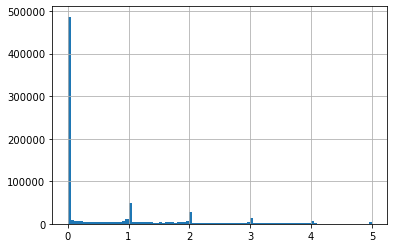

In [6]:
df['score'].hist(bins=100)